<a href="https://colab.research.google.com/github/Criell/Data/blob/master/Pandas_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
# upload dataset
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Data/Lina2/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pandas Advanced

<img src="attachment:movie_slashers.jpg" style="width:800px">

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)

Dataset `filmdeathcounts.csv`

**Ejercicio 1:** ¿Nos estamos volviendo más violentos con el tiempo en lo que a cine se refiere? ¿Cuánta evidencia tienes de tu respuesta? _Hint: Para poder responder bien a este ejercicio, serían interesantes dos gráficos: violencia por año y películas por año..._

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv(path + "filmdeathcounts.csv")

df = df.loc[:, ['Film', 'Year', 'Director', 'Genre', 'Body_Count', 'Length_Minutes','MPAA_Rating']]
df['MPAA_Rating'] = df['MPAA_Rating'].replace(['X', 'M','Unrated','NR'] ,['NC-17', 'PG', 'GP', 'PG'])
df

,Film,Year,Director,Genre,Body_Count,Length_Minutes,MPAA_Rating
0,24 Hour Party People,2002,Michael Winterbottom,Biography|Comedy|Drama|Music,7,117,R
1,28 Days Later,2002,Danny Boyle,Horror|Sci-Fi|Thriller,53,113,R
2,28 Weeks Later,2007,Juan Carlos Fresnadillo,Horror|Sci-Fi|Thriller,212,100,R
3,30 Days of Night,2007,David Slade,Horror|Thriller,67,113,R
4,300,2007,Zack Snyder,Action|Fantasy|History|War,600,117,R
...,...,...,...,...,...,...,...
540,Zatoichi,2003,Takeshi Kitano,Action|Comedy|Crime,81,116,R
541,Zodiac,2007,David Fincher,Crime|Drama|Mystery|Thriller,3,157,R
542,Zombieland,2009,Ruben Fleischer,Comedy|Horror,109,88,R
543,Zoolander,2001,Ben Stiller,Comedy,4,89,PG-13


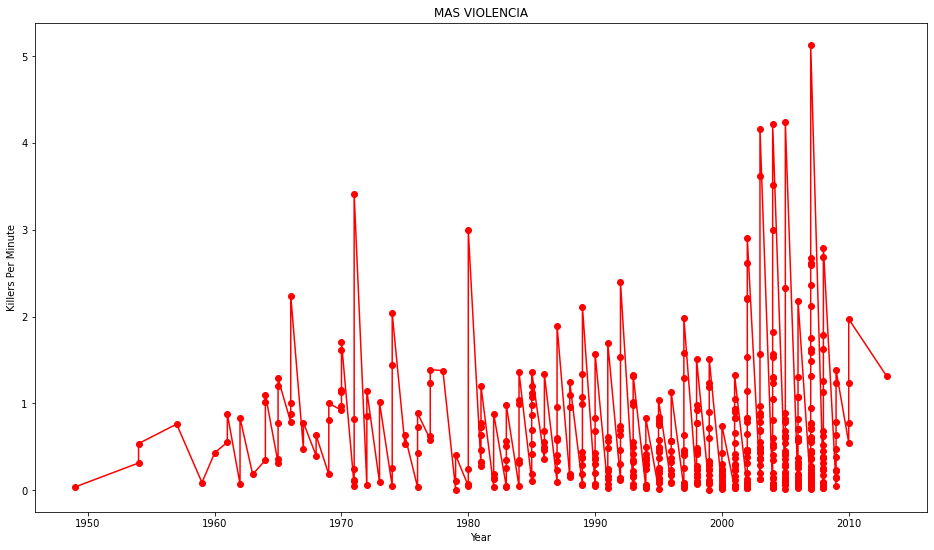

In [ ]:
df['Killers_Per_Minute'] = df['Body_Count'] / df['Length_Minutes']
df = df.sort_values(by=['Year', 'Killers_Per_Minute'])

x1 = df['Year']
y1 = df['Killers_Per_Minute']

plt.plot(x1,y1,'ro-')
plt.xlabel('Year')
plt.ylabel('Killers Per Minute')
plt.title('MAS VIOLENCIA')
plt.show()

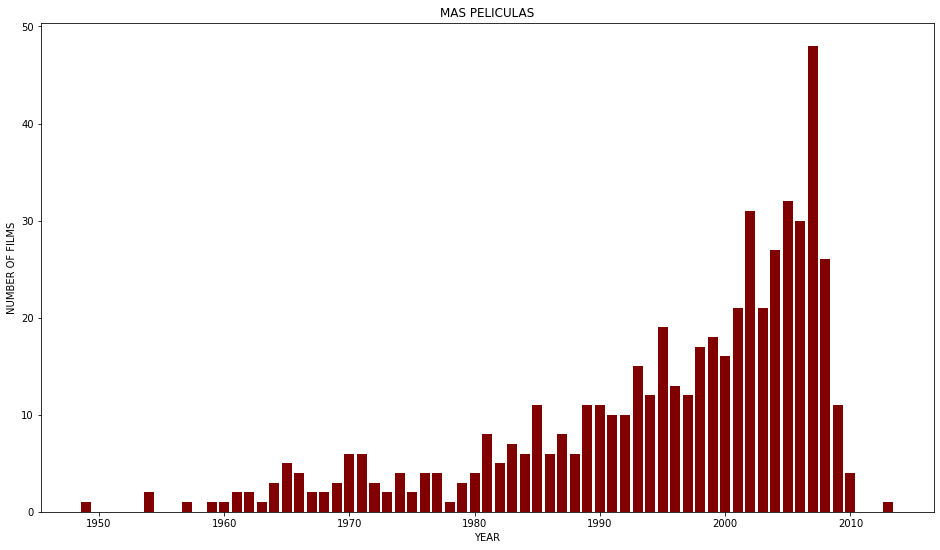

In [ ]:
movies_year = df.groupby('Year')['Film'].nunique().reset_index()
#print(movies_year.columns,'\n', movies_year.index,)

x2 = movies_year['Year']
y2 = movies_year['Film']

plt.bar(x2, y2, color ='maroon', width = 0.8) 
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF FILMS')
plt.title('MAS PELICULAS')
plt.show()

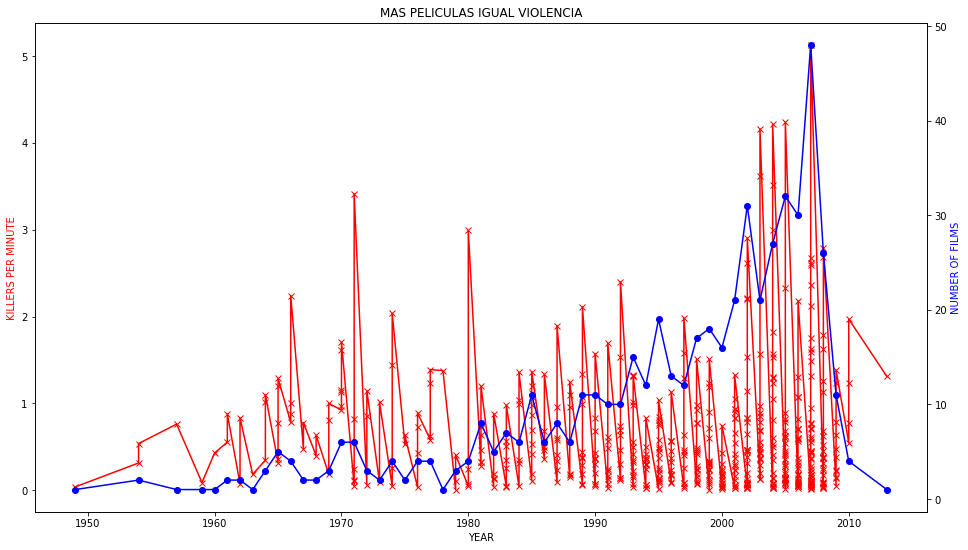

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x1, y1, 'rx-')
ax2.plot(x2, y2, 'bo-')

ax1.set_title('MAS PELICULAS IGUAL VIOLENCIA')
ax1.set_xlabel('YEAR')
ax1.set_ylabel('KILLERS PER MINUTE', color='r')
ax2.set_ylabel('NUMBER OF FILMS', color='b')

plt.show()

**Ejercicio 2:** ¿Cuál es la violencia media por cada calificación de la MPAA? _Hint: los ratings de la MPAA han cambiado con el tiempo. Hay que agrupar aquellos que significan lo mismo..._

In [ ]:
grouped = df.groupby('MPAA_Rating')
grouped = grouped['Killers_Per_Minute'].mean()

print(grouped)

MPAA_Rating
Approved   0.51
G          0.78
GP         0.88
NC-17      0.35
PG         0.59
PG-13      0.55
R          0.60
Name: Killers_Per_Minute, dtype: float64


**Ejercicio 3 [Hard mode]**: Muestra la violencia promedio por director y género: ¿cuál es el director y género más violentos?

Esta es la operación más compleja de todo el challenge:

In [ ]:
# ToDo: Convertir los valores de "director" y "género" en listas de directores y géneros. Hint: apply


# Creamos una columna donde cada fila es un director de la película, con el mismo índice que el dataframe original. 
# Si la película tiene más de un director, tendremos entonces varias filas con el mismo índice.
director = df.apply(lambda row: pd.Series(row['Director']),axis=1).stack().reset_index(level=1, drop=True)
director.name = 'Director'

# Hacemos lo mismo con el género
genre = df.apply(lambda row: pd.Series(row['Genre']),axis=1).stack().reset_index(level=1, drop=True)
genre.name = 'Genre'

# Eliminamos las columnas antiguas
df = df.drop('Director', axis=1)
df = df.drop('Genre', axis=1)

# Unimos las columnas nuevas al dataframe original haciendo match con el índice: como tenemos índices repetidos 
# tanto en la nueva columna director como en género, el dataframe resultante tendrá filas con todos los valores
# repetidos menos director y género.
df = df.join(director)
df = df.join(genre)

# ToDo: ... y ahora¿
print(df.info())
#print(df.to_string())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 488 to 278
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Film                545 non-null    object 
 1   Year                545 non-null    int64  
 2   Body_Count          545 non-null    int64  
 3   Length_Minutes      545 non-null    int64  
 4   MPAA_Rating         545 non-null    object 
 5   Killers_Per_Minute  545 non-null    float64
 6   Director            545 non-null    object 
 7   Genre               545 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 58.3+ KB
None


In [ ]:
dir_gen_violento = df.pivot_table(index=['Director','Genre'], values='Body_Count', aggfunc=[np.mean, np.max])
print(dir_gen_violento)
print(dir_gen_violento.columns,'\n', dir_gen_violento.index)

                                                     mean       amax
                                               Body_Count Body_Count
Director         Genre                                              
Aaron Norris     Action|Adventure|Thriller|War      92.00         92
                 War|Drama                         106.00        106
Abel Ferrara     Crime|Thriller                     38.00         38
Akira Kurosawa   Action|Adventure                   61.00         61
                 Action|Drama                       65.00         65
...                                                   ...        ...
Yimou Zhang      Action|Drama|History              152.00        152
Yoshiyuki Kuroda Action|Drama|Fantasy|History      169.00        169
Zack Snyder      Action|Drama|Mystery               77.00         77
                 Action|Fantasy|History|War        600.00        600
                 Action|Horror|Sci-Fi|Thriller     131.00        131

[503 rows x 2 columns]
MultiIndex

In [ ]:
dir_gen_violento = dir_gen_violento.sort_values(by=[('mean', 'Body_Count')], ascending=False)
dir_gen_violento.head()

,,mean,amax
,,Body_Count,Body_Count
Director,Genre,,
Ridley Scott,Action|Adventure|Drama|History|War,610.00,610
Zack Snyder,Action|Fantasy|History|War,600.00,600
Je-kyu Kang,Action|Drama|War,590.00,590
Wolfgang Petersen,Adventure|Drama,572.00,572
Edward Zwick,Action|Drama|History|War,558.00,558


***

Para los siguientes ejercicios recuperamos de nuevo "tmdb_5000_movies.csv", con más películas y más información sobre las mismas.

**Ejercicio 4 [Hard mode]:** ¿Cómo afecta el presupuesto de las películas al número de muertes?

In [ ]:
df1 = pd.read_csv(path + "filmdeathcounts.csv")
df2 = pd.read_csv(path + "tmdb_5000_movies.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Film            545 non-null    object 
 1   Year            545 non-null    int64  
 2   Body_Count      545 non-null    int64  
 3   MPAA_Rating     545 non-null    object 
 4   Genre           545 non-null    object 
 5   Director        545 non-null    object 
 6   Length_Minutes  545 non-null    int64  
 7   IMDB_Rating     545 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 34.2+ KB


In [ ]:
mer = pd.merge(df1, df2, left_on='Film', right_on='title', how='left').drop('title', axis=1)
mer['Dollar_Per_Kill'] = mer['budget'] / mer['Body_Count']
print(mer.info(), '\n')
mer = mer.loc[:, ['Film', 'budget', 'Body_Count' , 'Dollar_Per_Kill', 'Year']]
mer = mer.dropna()
print(mer.info(), '\n')
mer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Film                  546 non-null    object 
 1   Year                  546 non-null    int64  
 2   Body_Count            546 non-null    int64  
 3   MPAA_Rating           546 non-null    object 
 4   Genre                 546 non-null    object 
 5   Director              546 non-null    object 
 6   Length_Minutes        546 non-null    int64  
 7   IMDB_Rating           546 non-null    float64
 8   budget                363 non-null    float64
 9   genres                363 non-null    object 
 10  homepage              139 non-null    object 
 11  id                    363 non-null    float64
 12  keywords              363 non-null    object 
 13  original_language     363 non-null    object 
 14  original_title        363 non-null    object 
 15  overview              3

,Film,budget,Body_Count,Dollar_Per_Kill,Year
1,28 Days Later,"5,000,000.00",53,"94,339.62",2002
2,28 Weeks Later,"15,000,000.00",212,"70,754.72",2007
3,30 Days of Night,"30,000,000.00",67,"447,761.19",2007
4,300,"65,000,000.00",600,"108,333.33",2007
6,8MM,"40,000,000.00",1,"40,000,000.00",1999
...,...,...,...,...,...
540,You Only Live Twice,"9,500,000.00",91,"104,395.60",1967
542,Zodiac,"65,000,000.00",3,"21,666,666.67",2007
543,Zombieland,"23,600,000.00",109,"216,513.76",2009
544,Zoolander,"28,000,000.00",4,"7,000,000.00",2001


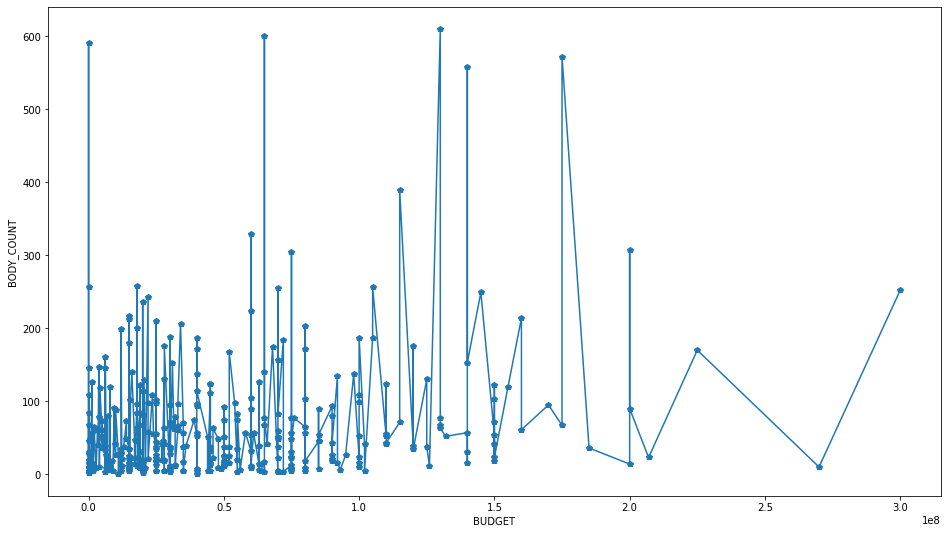

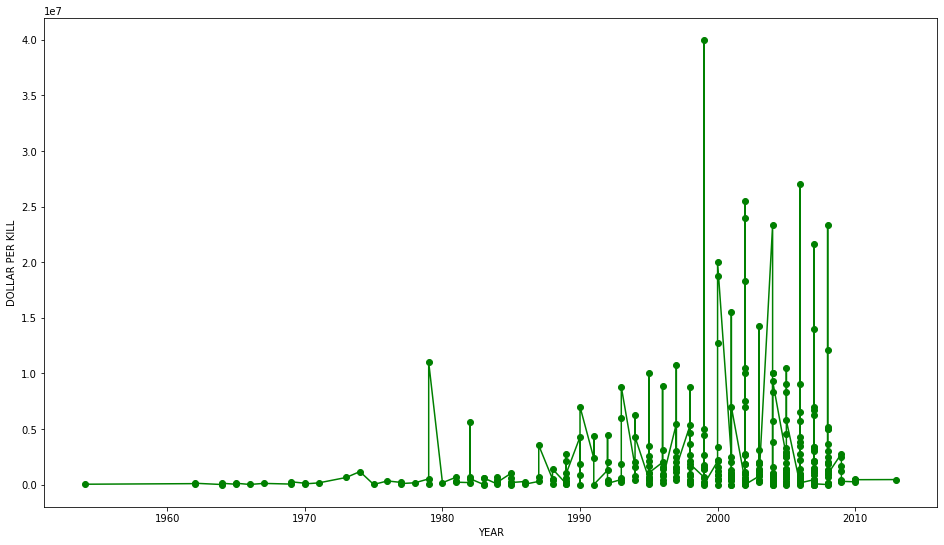

In [ ]:
mer = mer.sort_values(by=['budget'])
x = mer['budget']
y = mer['Body_Count']

plt.plot(x,y,'p-')
plt.xlabel('BUDGET')
plt.ylabel('BODY_COUNT')
plt.show()

mer = mer.sort_values(by=['Year'])
x = mer['Year']
y = mer['Dollar_Per_Kill']

plt.plot(x,y,'go-')
plt.xlabel('YEAR')
plt.ylabel('DOLLAR PER KILL')
plt.show()

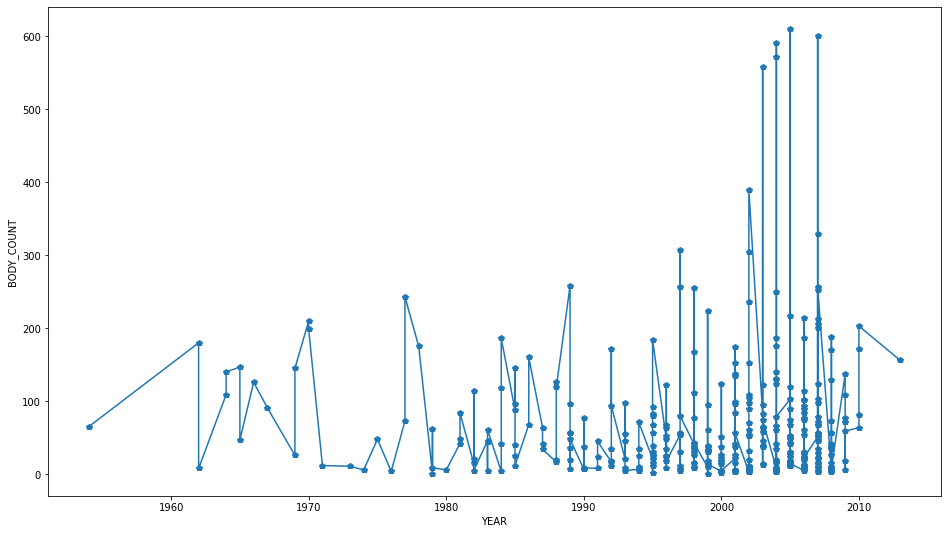

In [ ]:
mer = mer.sort_values(by=['Year'])
x = mer['Year']
y = mer['Body_Count']

plt.plot(x,y,'p-')
plt.xlabel('YEAR')
plt.ylabel('BODY_COUNT')
plt.show()